In [54]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [55]:
#Include depicted data...
#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("../BenzResults/Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
data_TAB= pd.read_csv("../BenzResults/Case_Liu/TAB_Case2.csv", header=None) # TAB_Case2.csv
data_PDPA= pd.read_csv("../BenzResults/Case_Liu/PDPA_Case2.csv", header=None) # PDPA_Case2.csv

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("../BenzResults/Case_Liu/TAB_Case3.csv", header=None) # TAB_Case3.csv
KH_Case3= pd.read_csv("../BenzResults/Case_Liu/Wave_Case3.csv", header=None) # SMD_KH_Case3Experiment.csv
PDPA_Case3= pd.read_csv("../BenzResults/Case_Liu/PDPA_Case3.csv", header=None) # PDPA_Case3.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("../BenzResults/Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("../BenzResults/Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv

#Case 4 -------------------------- ReD import
data_Wave= pd.read_csv("../BenzResults/Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
ReX= pd.read_csv("../BenzResults/Case_Liu/Trajectories/ReX.csv", header=None) 

#Case 2 ------------------------ Trajectory import
TAB_amp00_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_TAB_amp0_0.csv", header=None) # Trajectory_TAB_Case2.csv
Wave_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_wave_Dynamic.csv", header=None) # Trajectory_Wave_Case2.csv
Wave_st_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_Wave_Standard.csv", header=None) # Trajectory_Wave_Case2.csv
Traject_Exp_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_Experiment.csv", header=None) # Trajectory_Experiment_Case2.csv

#Case 4 -------------------------- Trajectory import
TAB_amp02_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_TAB_amp0_2.csv", header=None) # TAB_Traject_Case4.csv
TAB_amp00_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_TAB_amp0_0.csv", header=None) # TAB_sc_Traject_Case4.csv
Wave_st_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Wave_Standard.csv", header=None) # Trajectory_Wave_Case4.csv
Wave_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Wave_Dynamic.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Experiment.csv", header=None) # Trajectory_Experiment_Case4.csv

In [56]:
fdir = "./VTK/lagrangian/solidifyingSprayCloud"
#check if directory e
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()

In [57]:
# nd = 1
# create reader
reader = vtk.vtkXMLPolyDataReader()
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = []; sigma=[]; density=[]; dyn_viscosity=[];Reynolds=[];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d')))
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0')))    
    # sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma')))
    # dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu')))
    # density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho')))
    # Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re')))
    points.append((vtk_to_numpy(data.GetPoints().GetData())))

Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5122.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5196.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5271.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5347.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5422.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5497.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5576.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5655.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5730.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5806.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5882.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/solidifyingSprayCloud_5956.vtp
Reading: ./VTK/lagrangian/solidifyingSprayCloud/soli

In [58]:
print(point_d)

[array([0.00017], dtype=float32), array([0.00016999], dtype=float32), array([0.00016997], dtype=float32), array([0.00016996], dtype=float32), array([0.00016994], dtype=float32), array([0.00016993], dtype=float32), array([0.00016992], dtype=float32), array([0.00016991], dtype=float32), array([0.00016989], dtype=float32), array([0.00016988], dtype=float32), array([0.00016986], dtype=float32), array([0.00016985], dtype=float32), array([0.00016984], dtype=float32), array([0.00016983], dtype=float32), array([0.00016982], dtype=float32), array([0.00016981], dtype=float32), array([0.0001698], dtype=float32), array([0.0001698], dtype=float32), array([0.00016979], dtype=float32), array([0.00016978], dtype=float32), array([0.00016977], dtype=float32), array([0.00016976], dtype=float32), array([0.00016976], dtype=float32), array([0.00016975], dtype=float32), array([0.00016974], dtype=float32), array([0.00016973], dtype=float32), array([0.00016972], dtype=float32), array([0.00016971], dtype=float3

In [59]:
d0 =[];
for i in range(0, len(points)):
    d0.append(np.array(point_d0[i]))
d0=np.concatenate(d0,axis=0)

In [60]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))

In [61]:
diameter =[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))   
    diameter = [arr for arr in diameter if arr.size > 0]


In [62]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total, diameter_total))
c_sorted = c[np.argsort(c[:, 0])]

In [63]:
d2 = pow(c_sorted[:,2],2)
splitedSize = round(len(c_sorted[:,2])/60)

print(len(c_sorted[:,2]))

37


In [64]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)
 
splitedSize = round(len(c_sorted[:,2])/37)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]


In [65]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))

In [66]:
print(d_avg)

[0.00016999999934341758, 0.00016998700448311865, 0.00016997300554066896, 0.00016995900659821928, 0.00016994499310385436, 0.00016993199824355543, 0.00016991799930110574, 0.0001699050044408068, 0.00016989100549835712, 0.00016987799608614296, 0.00016986399714369327, 0.00016985100228339434, 0.00016983799287118018, 0.0001698279957054183, 0.00016982000670395792, 0.0001698120031505823, 0.0001698039995972067, 0.00016979500651359558, 0.00016978700296021998, 0.00016977899940684438, 0.00016977099585346878, 0.0001697630068520084, 0.0001697550032986328, 0.0001697469997452572, 0.00016973800666164607, 0.00016973000310827047, 0.00016972199955489486, 0.00016971399600151926, 0.00016970399883575737, 0.00016968999989330769, 0.00016967499686870724, 0.0001696599938441068, 0.00016964500537142158, 0.0001696310064289719, 0.00016961600340437144, 0.000169601000379771, 0.0001695870014373213]


(0.05485, 0.05505)

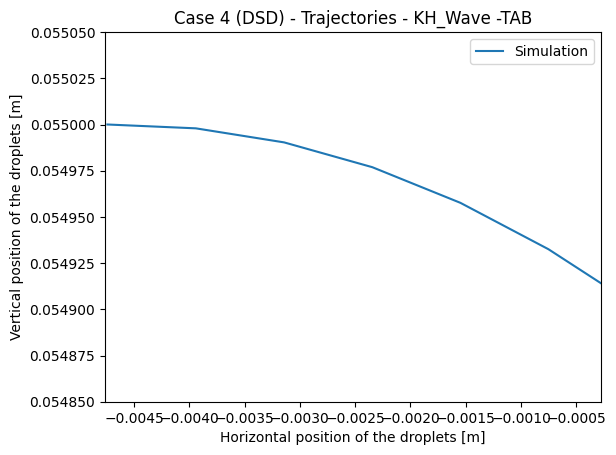

In [76]:
######################################
#####*********Tarjectory*********#####
######################################

#plt.plot(c_sorted[:,0],c_sorted[:,1], label='Simulation')
plt.plot(c_avgx,c_avgy, label='Simulation')
#plt.plot(TAB_amp00_Traject_Case4.iloc[:,0], TAB_amp00_Traject_Case4.iloc[:,1], '--',label=' TAB Liu et al.')
#plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--',color='C0',label='Dynamic Wave Liu et al.')
plt
#.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], '+',color='C0',label='Standard Wave Liu et al.')
#plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o',label='Experiment PDPA')
plt.legend()
plt.title('Case 4 (DSD) - Trajectories - KH_Wave -TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
# plt.xlim(-0.0047625, 0.00002375)
plt.xlim(-0.0047625, -0.00027625)
plt.ylim(0.05485,0.05505)

ValueError: x and y must have same first dimension, but have shapes (37,) and (0,)

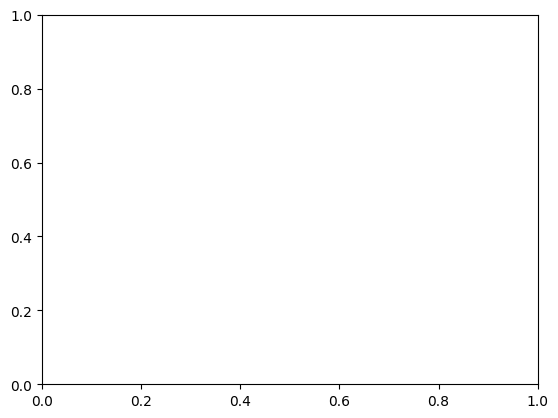

In [71]:
######################################
#####*********Re  Case4**********#####
######################################

Reynolds = [arr for arr in Reynolds if arr.size > 0]
plt.plot(c_sorted[:,0], Reynolds, label='Re by Simulation')
plt.plot(ReX.iloc[:,0],ReX.iloc[:,1], '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Case 4 - Reynolds number by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Reynolds number')
plt.xlim(-0.0047625,0.0002375)

(-0.0047625, 0.0002375)

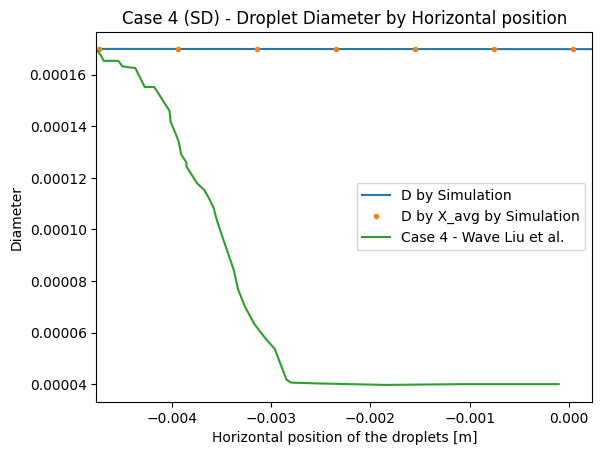

In [69]:
######################################
#####*********Re  Case4**********#####
######################################

plt.plot(c_sorted[:,0], c_sorted[:,2], label='D by Simulation')
plt.plot(c_avgx,d_avg, '.', label='D by X_avg by Simulation')
# plt.plot(c_sorted[:,0],c_sorted[:,2],label='KH current work')
plt.plot(data_C4_SingleD.iloc[:,0]-0.0047625,data_C4_SingleD.iloc[:,1]/1e6, '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Case 4 (SD) - Droplet Diameter by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Diameter')
plt.xlim(-0.0047625,0.0002375)